# 3 신경망

## 3.1 퍼셉트론에서 신경망으로

## 3.2 활성화 함수

### 3.2.2 계단 함수 구현

In [75]:
import numpy as np

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
    
# x가 부동소수점만 받아들이므로 넘파이 배열도 지원하도록 수정
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [76]:
x = np.array([-1.0, 1.0, 2.0])

y = x > 0
print(y)

y = y.astype(np.int)
print(y)

[False  True  True]
[0 1 1]


### 3.2.3 계단 함수의 그래프

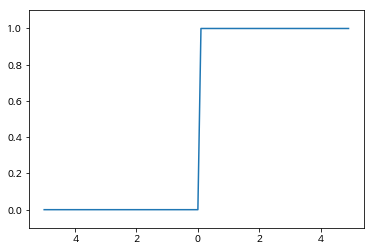

In [77]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현

In [78]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

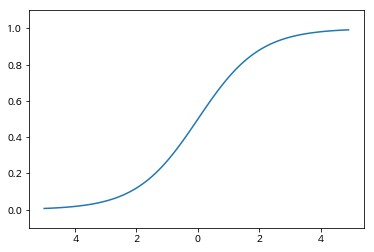

In [79]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

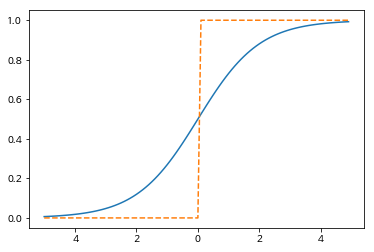

In [80]:
plt.plot(x, y)
plt.plot(x, step_function(x), linestyle='--')

### 3.2.6 비선형 함수

- 신경망에서 선형 함수는 층을 쌓는 이점을 살릴 수 없기 때문(그저, 출력 = 입력x상수)

### 3.2.7 ReLU 함수

- 입력이 0을 넘으면 그 입력을 그대로를, 0 이하이면 0을 출력

In [14]:
def relu(x):
    return np.maximum(0, x)

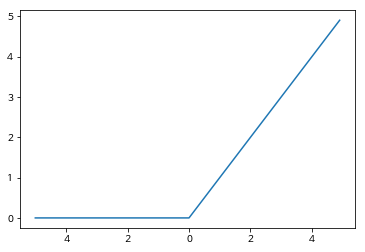

In [15]:
plt.plot(x, relu(x))

## 3.3 다차원 배열의 계산

### 3.3.2 행렬의 내적(행렬 곱)

In [16]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
print("A와 B 행렬의 내적은: \n{}".format(A.dot(B)))

A와 B 행렬의 내적은: 
[[22 28]
 [49 64]]


### 3.3.3 신경망의 내적

In [17]:
X = np.array([1, 2])
w = np.array([[1, 3, 5], [2, 4, 6]])
Y = X.dot(w)
print("입력 값 1, 2에 가중치 w의 곱은: \n{}".format(Y))

입력 값 1, 2에 가중치 w의 곱은: 
[ 5 11 17]


## 3.4 3층 신경망 구현

### 3.4.2 각 층의 신호 전달 구현

In [18]:
# 입력층에서 1층으로
x = np.array([1.0, 0.5])
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

a1 = np.dot(x, w1) + b1
z1 = sigmoid(a1)

print(a1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [19]:
# 1층에서 2층으로
w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

a2 = np.dot(z1, w2) + b2
z2 = sigmoid(a2)

print(a2)
print(z1)

[0.51615984 1.21402696]
[0.57444252 0.66818777 0.75026011]


In [20]:
# 2층에서 출력층으로
def identity_function(x):
    return x

w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

a3 = np.dot(z2, w3) + b3
y = identity_function(a3)

print(y)

[0.31682708 0.69627909]


### 3.4.3 구현 정리

In [21]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계

- 회귀에서는 항등 함수
- 분류에서는 소프트맥스 함수, 일반적으로

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

## $y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}$


- n: 출력층의 뉴런 수
- k: k번째 출력

In [22]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [23]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [24]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [25]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

- 오버플로: 지수함수 사용시 아주 큰 값이 나올 수 있는데, 계산시 불안정 해지는 점
- 컴퓨터 수의 범위가 한정되어 있기 때문


#### 개선한 수식


## $y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}$ = $\frac{Cexp(a_k)}{C\sum_{i=1}^n exp(a_i)}$ 


## = $\frac{exp(a_k + logC)}{\sum_{i=1}^n exp(a_i + logC)}$ = $\frac{exp(a_k + C')}{\sum_{i=1}^n exp(a_i + C')}$


① C라는 임의의 정수를 분자와 분모에 곱해줌

② C를 지수 함수 $exp()$ 안으로 옮겨 $logC$를 만듬

③ $logC$를 $C'$라는 기호로 바꿈

#### ※ 식의 의미
- 어떤 정수를 더해도 결과는 바뀌지 않음
- 그러나 입력 신호 중 최댓값을 대입하면 오버플로를 막을 수 있음

In [26]:
# 제대로 계산되지 않음
a = np.array([1010, 1000, 990])
print("수정 전, 계산 X {}".format(np.exp(a) / np.sum(np.exp(a))))

c = np.max(a)
a - c

# 계산 됨
print("수정 후, 계산 O {}".format(np.exp(a - c) / np.sum(np.exp(a - c))))

수정 전, 계산 X [nan nan nan]
수정 후, 계산 O [9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\JH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# 수정 된 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3 소프트맥스 함수의 특징

- 함수의 출력을 '확률'로 해석할 수 있음
- 출력에 따른 원소 내 위치는 바뀌지 않음
- 현업에서는 소프트맥스 함수를 생략하는 것이 일반적
- 다만 학습시킬 때는 출력층에서 사용

In [28]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


### 3.5.4 출력층의 뉴런 수 정하기

- 풀려는 문제에 맞게 적절히 정해야 함
- 예) 입력 이미지를 3개로 분류하려면 출력층 뉴런 3개로 설정

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

In [29]:
%run mnist.py

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [36]:
import sys, os
sys.path.append(os.pardir)
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    # 정규화
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [37]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)


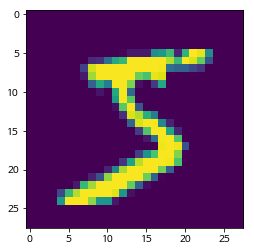

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지 모양으로 변형
print(img.shape)

# img_show(img)

fig, axes = plt.subplots()
plt.imshow(img)

### 3.6.2 신경망의 추론 처리

- MNIST 데이터셋을 가지고 신경망 구현
    - 입력층 뉴런 784개 (이미지의 크기가 28X28=784이기 때문)
    - 출력층 뉴런 10개 (0~9 숫자를 구분하는 문제이기 때문)
    - 은닉층은 2층, 뉴런 수 각각 50, 100개 (임의로 지정)

In [45]:
# 데이터 불러오기
def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# 가중치와 편향 불러오기
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

# 예측 모델
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [46]:
x, t = get_data()
network = init_network()

accuracy_cut = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스
    if p == t[i]:
        accuracy_cut += 1
        
print("Accuracy:" + str(float(accuracy_cut) / len(x)))

Accuracy:0.9352


### 3.6.3 배치 처리

- 하나로 묶은 입력 데이터를 뜻함
- 가중치 매개변수의 형상 확인
- 원소의 배열 수가 일치함을 확인

#### 이미지 데이터가 1개일 때의 처리 흐름

In [59]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(784,)
(784, 50)
(50, 100)
(100, 10)


#### 이미지 데이터가 100개일 때의 처리 흐름

In [63]:
print(x[0:100].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)
print(x[0:100].shape[0], W3.shape[1])

(100, 784)
(784, 50)
(50, 100)
(100, 10)
100 10


#### 배치 처리의 이점

① 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리하도록 최적화

② 데이터 전송이 병목으로 작용하는 경우 잦음, 배치 처리를 함으로써 버스에 부하를↓

③ 느린 I/O를 통해 데이터 읽는 횟수가 줄어, CPU나 GPU로 순수 계산하는 비율이 높아짐

In [65]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [74]:
# argmax의 이해를 돕기 위한 예제
x = np.array([[0.1, 0.8, 0.1],
              [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3],
              [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]
